In [1]:
# Standard Libraries
import re

# Data Handling and Processing Libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import seaborn as sns

# Natural Language Processing Libraries
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Deep Learning Libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Visualization Library
import matplotlib.pyplot as plt


C:\Users\CATALINA\AppData\Local\Temp\ipykernel_26740\1242780876.py:5: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\CATALINA\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\CATALINA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\CATALINA\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
data = pd.read_csv('../data/news/news_part1.csv')
data

,Ticker,Title,URL,Time Published,Authors,Summary,Relevance Score,Ticker Sentiment Score,Ticker Sentiment Label,Technology,...,Retail & Wholesale,Economy - Monetary,Energy & Transportation,Life Sciences,Blockchain,IPO,Earnings,Mergers & Acquisitions,Manufacturing,Finance
0,META,Ads running on Meta saw return on spending inc...,https://www.business-standard.com/companies/ne...,2024-01-18 17:28:08,['Bloomberg'],Ads running on Meta Platforms Inc.'s apps saw ...,0.250386,0.424632,Bullish,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.00000,0.000000,0.000000
1,AAPL,Ads running on Meta saw return on spending inc...,https://www.business-standard.com/companies/ne...,2024-01-18 17:28:08,['Bloomberg'],Ads running on Meta Platforms Inc.'s apps saw ...,0.250386,0.094962,Neutral,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.00000,0.000000,0.000000
2,HUM,Here are the reasons why a new Wall Street upg...,https://www.cnbc.com/2024/01/18/what-activist-...,2024-01-18 16:48:19,['Jeff Marks'],"The Investing Club holds its ""Morning Meeting""...",0.298567,0.098222,Neutral,0.500000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.158519,0.00000,0.000000,0.500000
3,AAPL,Here are the reasons why a new Wall Street upg...,https://www.cnbc.com/2024/01/18/what-activist-...,2024-01-18 16:48:19,['Jeff Marks'],"The Investing Club holds its ""Morning Meeting""...",0.298567,0.098222,Neutral,0.500000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.158519,0.00000,0.000000,0.500000
4,BAC,Here are the reasons why a new Wall Street upg...,https://www.cnbc.com/2024/01/18/what-activist-...,2024-01-18 16:48:19,['Jeff Marks'],"The Investing Club holds its ""Morning Meeting""...",0.076358,0.045194,Neutral,0.500000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.158519,0.00000,0.000000,0.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79492,CRWD,2 Cybersecurity Stocks You Can Buy and Hold fo...,https://www.fool.com/investing/2023/08/27/2-cy...,2023-08-27 10:30:00,['Jeff Santoro'],These two companies have bright futures despit...,0.307731,0.219216,Somewhat-Bullish,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.999975,0.00000,0.000000,0.000000
79493,PATH,3 Supercharged Tech Stocks to Buy Without Any ...,https://www.fool.com/investing/2023/08/26/3-su...,2023-08-26 10:45:00,['Keithen Drury'],There are still some growth stocks available t...,0.472821,0.306128,Somewhat-Bullish,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.744043,0.00000,0.000000,0.000000
79494,CRWD,3 Supercharged Tech Stocks to Buy Without Any ...,https://www.fool.com/investing/2023/08/26/3-su...,2023-08-26 10:45:00,['Keithen Drury'],There are still some growth stocks available t...,0.425925,0.135673,Neutral,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.744043,0.00000,0.000000,0.000000
79495,DE,Weekly Roundup,https://aap.thestreet.com/story/16131864/1/wee...,2023-08-25 22:01:00,[],Stocks staged a late comeback this week after ...,0.020001,0.109825,Neutral,0.166667,...,0.166667,0.999682,0.166667,0.166667,0.0,0.310843,1.000000,0.77141,0.166667,0.166667


In [3]:
# Check duplicate rows in dataset
data=data.drop_duplicates()
data.count()

Ticker                        68175
Title                         68175
URL                           68175
Time Published                68175
Authors                       68175
Summary                       68175
Relevance Score               68175
Ticker Sentiment Score        68175
Ticker Sentiment Label        68175
Technology                    68175
Financial Markets             68175
Economy - Fiscal              68175
Economy - Macro               68175
Real Estate & Construction    68175
Retail & Wholesale            68175
Economy - Monetary            68175
Energy & Transportation       68175
Life Sciences                 68175
Blockchain                    68175
IPO                           68175
Earnings                      68175
Mergers & Acquisitions        68175
Manufacturing                 68175
Finance                       68175
dtype: int64

## Preprocessing Steps

In [4]:
# Combining 'Title' and 'Summary' into a single text feature
data = data.copy()
data['Combined_Text'] = data['Title'] + " " + data['Summary']

In [5]:
# Label Encoding for 'Ticker Sentiment Label'
label_encoder = LabelEncoder()
data['Ticker Sentiment Label Encoded'] = label_encoder.fit_transform(data['Ticker Sentiment Label'])

In [6]:
# Function to preprocess the DataSet
def preprocess_text(text):
    # Lowercasing
    text = text.lower()

    # Removing punctuation
    text = re.sub(r'[^\w\s]', '', text)

    # Tokenization
    tokens = word_tokenize(text)

    # Removing stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    return ' '.join(tokens)

# Applying the preprocessing function to the combined text column
data['Processed_Text'] = data['Combined_Text'].apply(preprocess_text)


### Tokenization

In [7]:
# Tokenize the text data without limiting max_features
full_tokenizer = Tokenizer()
full_tokenizer.fit_on_texts(data['Processed_Text'])

# Calculate vocabulary size
word_counts = full_tokenizer.word_counts
vocabulary_size = len(word_counts)
print("Vocabulary Size:", vocabulary_size)

# Analyze word frequency distribution
word_freq = pd.DataFrame(word_counts.items(), columns=['word', 'count'])
word_freq = word_freq.sort_values(by='count', ascending=False)
print("Word Frequency:", word_freq)


Vocabulary Size: 23542
Word Frequency:            word  count
30        stock  45691
107      market  30064
307    investor  15933
88     earnings  15747
190     company  14214
...         ...    ...
21794      wear      1
19829     fogel      1
19828     glenn      1
4704    nightly      1
9706    sabadra      1

[23542 rows x 2 columns]


In [8]:
# Given the vocabulary size, setting the maximum number of features to 10,000 seems reasonable. 
# This approach is particularly effective if the most frequent 10,000 words encompass the core content and sentiment of the text.
max_features = 10000  
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(data['Processed_Text'])
sequences = tokenizer.texts_to_sequences(data['Processed_Text'])

In [9]:
# Calculate the length of each sequence
sequence_lengths = [len(sequence) for sequence in sequences]

# Find the maximum length
max_sequence_length = max(sequence_lengths)

print("Maximum sequence length:", max_sequence_length)

Maximum sequence length: 216


In [10]:
# Given Maximum sequence length, setting the maxlen to 500 seems reasonable to run the model.
maxlen = 500
datatokenized = pad_sequences(sequences, maxlen=maxlen) 

### Preparing Labels

In [11]:
# Encode the 'Ticker Sentiment Label' as integers and then convert to one-hot encoded labels for neural network training.
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(data['Ticker Sentiment Label'])
labels = to_categorical(integer_encoded)

### Splitting the Dataset into Training and Testing Sets

In [12]:
# Split the tokenized data and labels into training and testing sets, with 20% of the data reserved for testing.
X_train, X_test, y_train, y_test = train_test_split(datatokenized, labels, test_size=0.2, random_state=42)

In [13]:
# Display the shape, first few entries, and data type of the tokenized data for verification and insight.
print("Shape of data tokenized:", datatokenized.shape)
print("First few entries in data tokenized:\n", datatokenized[:5])
print("Data type of data tokenized:", datatokenized.dtype)

Shape of data tokenized: (68175, 500)
First few entries in data tokenized:
 [[   0    0    0 ...  140  852  268]
 [   0    0    0 ...  140  852  268]
 [   0    0    0 ... 3038 2805 1876]
 [   0    0    0 ... 3038 2805 1876]
 [   0    0    0 ... 3038 2805 1876]]
Data type of data tokenized: int32


In [14]:
# Output the shape, first few instances, and data type of the labels to ensure correct formatting for model training.
print("Shape of labels:", labels.shape)
print("First few labels:\n", labels[:5])
print("Data type of labels:", labels.dtype)

Shape of labels: (68175, 5)
First few labels:
 [[0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]]
Data type of labels: float32


In [15]:
# Display the sizes of the training and testing sets for both features and labels to confirm the split proportions.
print("Size of X_train:", len(X_train))
print("Size of X_test:", len(X_test))
print("Size of y_train:", len(y_train))
print("Size of y_test:", len(y_test))

Size of X_train: 54540
Size of X_test: 13635
Size of y_train: 54540
Size of y_test: 13635


## Approach - LSTM

### Building the Deep Learning Model

In [16]:
# Define the neural network model: an LSTM with an embedding layer for text data and a dense layer for multi-class classification.
embedding_dim = 128
lstm_units = 50
num_classes = labels.shape[1]  

model = Sequential()
model.add(Embedding(input_dim=max_features, output_dim=embedding_dim, input_length=maxlen))
model.add(LSTM(lstm_units, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(num_classes, activation='softmax'))  

### Compiling the Model

In [17]:
# Compile the model with categorical cross-entropy loss function, Adam optimizer, and accuracy as the metric.
# The adam optimizer is chosen for several reasons:
# 1. It is known for being computationally efficient, requiring relatively low memory.
# 2. It maintains a learning rate for each network parameter (weight) and adapts these rates throughout the training process.
# 3. It is faster than other optimizers like stochastic gradient descent (SGD), especially in complex neural networks and large datasets.
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 500, 128)          1280000   
                                                                 
 lstm (LSTM)                 (None, 50)                35800     
                                                                 
 dense (Dense)               (None, 5)                 255       
                                                                 
Total params: 1316055 (5.02 MB)
Trainable params: 1316055 (5.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Training the Model

In [18]:
# Train the model on the training set with a batch size of 32 and 10 epochs, using 10% of the data for validation.
history = model.fit(X_train, y_train, batch_size=32, epochs=10, validation_split=0.1)

Epoch 1/10


1534/1534 [==============================] - 1092s 710ms/step - loss: 0.8227 - accuracy: 0.6793 - val_loss: 0.7669 - val_accuracy: 0.6889
Epoch 2/10
1534/1534 [==============================] - 1060s 691ms/step - loss: 0.6958 - accuracy: 0.7174 - val_loss: 0.7538 - val_accuracy: 0.6984
Epoch 3/10
1534/1534 [==============================] - 1041s 678ms/step - loss: 0.6411 - accuracy: 0.7370 - val_loss: 0.7541 - val_accuracy: 0.7004
Epoch 4/10
1534/1534 [==============================] - 1143s 745ms/step - loss: 0.6006 - accuracy: 0.7486 - val_loss: 0.7652 - val_accuracy: 0.7011
Epoch 5/10
1534/1534 [==============================] - 1271s 828ms/step - loss: 0.5741 - accuracy: 0.7554 - val_loss: 0.7668 - val_accuracy: 0.7021
Epoch 6/10
1534/1534 [==============================] - 1291s 842ms/step - loss: 0.5522 - accuracy: 0.7620 - val_loss: 0.8194 - val_accuracy: 0.6956
Epoch 7/10
1534/1534 [==============================] - 1271s 828ms/step - loss: 0.5340 - accuracy: 0.76

### Evaluating the Model

In [19]:
# Evaluate the model's performance on the test set and print out the test accuracy as a percentage.
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_accuracy * 100:.2f}%")

427/427 [==============================] - 32s 75ms/step - loss: 0.9211 - accuracy: 0.7006
Test accuracy: 70.06%


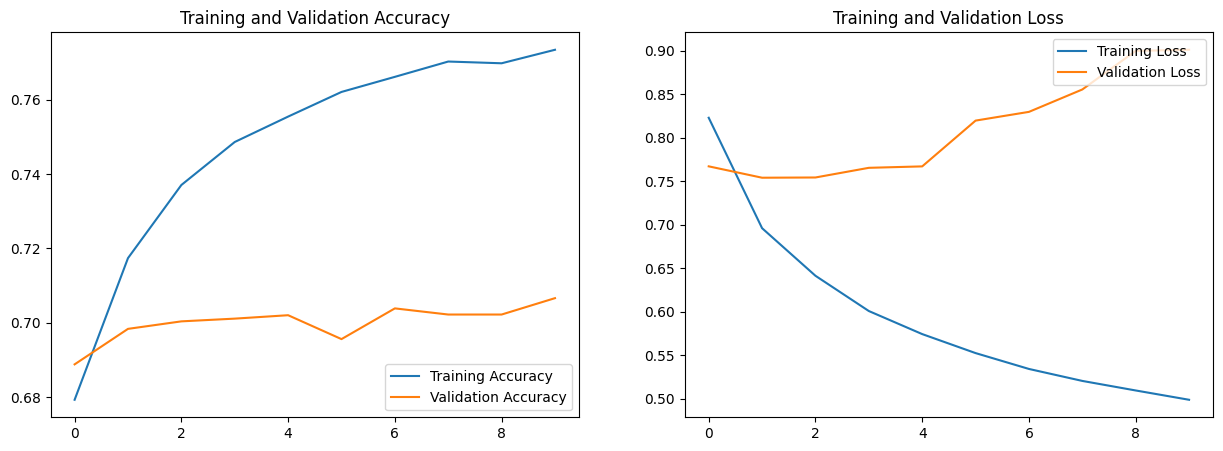

In [21]:
# Plotting training and validation accuracy and loss over epochs to assess model performance.
# The figure consists of two subplots: one for accuracy and another for loss, each with training and validation curves.
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(len(acc))

plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Approach LSTM - EarlyStopping

In [19]:
embedding_dim = 128
lstm_units = 30  
num_classes = labels.shape[1]

In [20]:
# Building the model
model = Sequential()
model.add(Embedding(input_dim=max_features, output_dim=embedding_dim, input_length=maxlen))
model.add(LSTM(lstm_units, dropout=0.2, recurrent_dropout=0.2))
model.add(Dropout(0.5))  # Added Dropout layer
model.add(Dense(num_classes, activation='softmax', kernel_regularizer=l2(0.01)))  # Added L2 regularization

In [21]:
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [22]:
# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [23]:
# Train the model with early stopping
history = model.fit(X_train, y_train, batch_size=32, epochs=10, validation_split=0.1, callbacks=[early_stopping])

Epoch 1/10


1534/1534 [==============================] - 913s 593ms/step - loss: 0.9114 - accuracy: 0.6724 - val_loss: 0.8152 - val_accuracy: 0.6817
Epoch 2/10
1534/1534 [==============================] - 1016s 662ms/step - loss: 0.7726 - accuracy: 0.7050 - val_loss: 0.7920 - val_accuracy: 0.6896
Epoch 3/10
1534/1534 [==============================] - 1079s 703ms/step - loss: 0.7169 - accuracy: 0.7234 - val_loss: 0.7715 - val_accuracy: 0.6931
Epoch 4/10
1534/1534 [==============================] - 1045s 681ms/step - loss: 0.6847 - accuracy: 0.7356 - val_loss: 0.7707 - val_accuracy: 0.6969
Epoch 5/10
1534/1534 [==============================] - 1021s 666ms/step - loss: 0.6609 - accuracy: 0.7425 - val_loss: 0.7720 - val_accuracy: 0.6982
Epoch 6/10
1534/1534 [==============================] - 1042s 679ms/step - loss: 0.6421 - accuracy: 0.7501 - val_loss: 0.7869 - val_accuracy: 0.6940
Epoch 7/10
1534/1534 [==============================] - 1152s 751ms/step - loss: 0.6267 - accuracy: 0.756

### Evaluating the Model

In [31]:
# Evaluate the model's performance on the test set and print out the test accuracy as a percentage.
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy*100:.2f}%')

427/427 [==============================] - 38s 89ms/step - loss: 0.7770 - accuracy: 0.6986
Test Accuracy: 69.86%


In [27]:
# Making predictions 
predictions = model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)

427/427 [==============================] - 39s 90ms/step


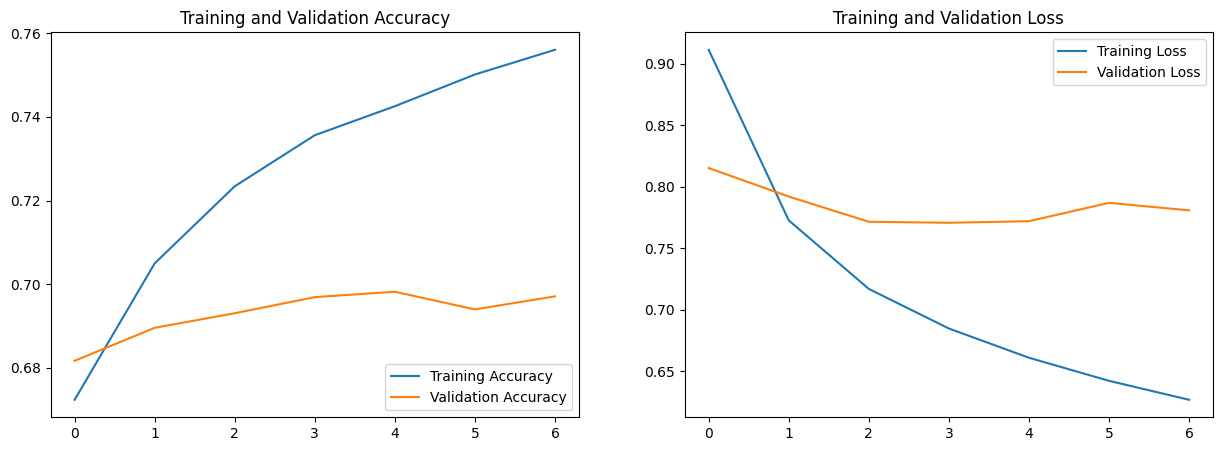

In [29]:
# Plotting training and validation accuracy and loss over epochs to assess model performance.
# The figure consists of two subplots: one for accuracy and another for loss, each with training and validation curves.
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(len(acc))

plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()